In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
credit = pd.read_csv('credit_scoring.csv', sep=';')

In [3]:
credit.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [4]:
X = credit.iloc[:,:13]
Y = credit.iloc[:,13]

In [5]:
MP = 100*np.sum(Y == 0)/len(Y)
BP = 100*np.sum(Y == 1)/len(Y)

# Apprentissage

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
print('train', X_train.shape, y_train.shape, 'test', X_test.shape, y_test.shape)


train (2187, 13) (2187,) test (2188, 13) (2188,)


In [8]:

""" 
    Fontion utilitaire d'affichage des résultat d'un algorithme : matrice de confusion, accuracy, precision
"""
def log_result(Y_test, Y_pred, algoType, note):
    print("--- ", algoType, " ---" )
    m_confusion = confusion_matrix(Y_test, Y_pred )
    print("Matrice de confusion", algoType, note)
    print(m_confusion)
    acc = round(100*accuracy_score(Y_test, Y_pred), 2)
    prec = round(100*precision_score(Y_test, Y_pred), 2)
    print(algoType, note, ' : Accuracy  ', acc , 'Precision' , prec)

In [9]:
""" Fonction qui applique successivement les 3 algorithmes : 
        . Arbre de décision
        . K plus proches voisins
        . Perceptron multi-couches
"""
def apply_classifier(X_train, _train, X_test, Y_test, note):
    # Arbre de décision
    DT = DecisionTreeClassifier(criterion = 'gini', random_state=1)
    DT.fit(X_train, y_train)
    Y_pred = DT.predict(X_test)
    log_result(Y_test, Y_pred, 'arbre de décision', note)
    
    # K plus prohces voisins
    KNN = KNeighborsClassifier(n_neighbors=5)
    KNN.fit(X_train, y_train)
    Y_pred = KNN.predict(X_test)
    log_result(Y_test, Y_pred, 'K plus proches voisins', note)

    #MultilayerPerceptron à deux couches de tailles respectives 40 et 20 et random_state=1
    MLP = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(40, 20), random_state=1)
    MLP.fit(X_train, y_train)
    Y_pred = MLP.predict(X_test)
    log_result(Y_test, Y_pred, 'Perceptron multi couches', note)
    

# Normalisation

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
SC = StandardScaler()
SC.fit(X_train)
X_train_norm = SC.transform(X_train)
X_test_norm = SC.transform(X_test)

apply_classifier(X_train_norm, y_train, X_test_norm, y_test, 'avec normalisation')


---  arbre de décision  ---
Matrice de confusion arbre de décision avec normalisation
[[ 322  282]
 [ 315 1269]]
arbre de décision avec normalisation  : Accuracy   72.71 Precision 81.82
---  K plus proches voisins  ---
Matrice de confusion K plus proches voisins avec normalisation
[[ 286  318]
 [ 223 1361]]
K plus proches voisins avec normalisation  : Accuracy   75.27 Precision 81.06
---  Perceptron multi couches  ---
Matrice de confusion Perceptron multi couches avec normalisation
[[ 345  259]
 [ 222 1362]]
Perceptron multi couches avec normalisation  : Accuracy   78.02 Precision 84.02


# Création de nouvelles variables caractéristiques

In [12]:
from sklearn.decomposition import PCA

In [13]:
# avec normalisation et ACP

pca=PCA(n_components =3)
pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_train_pca = np.concatenate((X_train_norm, X_train_pca), axis=1)

X_test_pca = pca.transform(X_test_norm)
X_test_pca = np.concatenate((X_test_norm, X_test_pca), axis=1)

# dans evplutionPLot, ajouter le param sorded_idx
apply_classifier(X_train_pca, y_train, X_test_pca, y_test, 'avec ACP')


---  arbre de décision  ---
Matrice de confusion arbre de décision avec ACP
[[ 351  253]
 [ 324 1260]]
arbre de décision avec ACP  : Accuracy   73.63 Precision 83.28
---  K plus proches voisins  ---
Matrice de confusion K plus proches voisins avec ACP
[[ 283  321]
 [ 212 1372]]
K plus proches voisins avec ACP  : Accuracy   75.64 Precision 81.04
---  Perceptron multi couches  ---
Matrice de confusion Perceptron multi couches avec ACP
[[ 323  281]
 [ 211 1373]]
Perceptron multi couches avec ACP  : Accuracy   77.51 Precision 83.01


features [  9.   1.  60.  30.   0.   1.   1.  73. 129.   0.   0. 800. 846.   1.]
[129.   9. 846. 800.  30.   0.  73.   1.  60.   1.   0.   1.   0.]


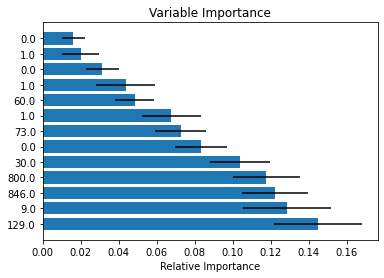

In [14]:
#Ainsi, il faut afficher un histogramme des importances des variables. 
from sklearn.ensemble import RandomForestClassifier

features = credit.iloc[0,:].values
print("features", features)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_norm, y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
print(features[sorted_idx])
padding = np.arange(X_train_norm.size/len(X_train_norm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

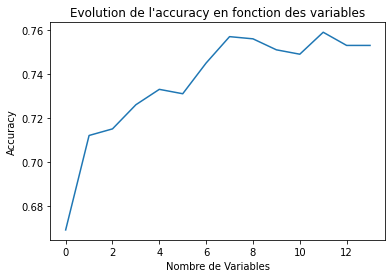

In [15]:
# Déterminer ensuite le nombre de variables à garder en exécutant le code suivant
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train_norm.shape[1]+1)
for f in np.arange(0, X_train_norm.shape[1]+1):
    X1_f = X_train_norm[:,sorted_idx[:f+1]]
    X2_f = X_test_norm[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,y_train)
    y_pred = KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(y_test,y_pred),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV


In [17]:
parameters = {'n_neighbors' : [1,3,5,7,9,11,13,15], 'algorithm': ['ball_tree','kd_tree','brute']}
model = KNeighborsClassifier()

GS = GridSearchCV(model, parameters, scoring='accuracy',cv=10)
grille = GS.fit(X_train_norm, y_train)

print(grille.best_params_)
print(grille.best_score_)

YKNN_O = grille.predict(X_test_norm)
print("Accuracy_score d'un KNN optimise: {0:.3f}".format(accuracy_score(y_test,YKNN_O)))

{'algorithm': 'ball_tree', 'n_neighbors': 13}
0.7667944367642746
Accuracy_score d'un KNN optimise: 0.773


In [18]:
parameters = {'n_neighbors' : [1,3,5,7,9,11,13,15]}
model = KNeighborsClassifier(n_neighbors=5)

GS = GridSearchCV(model, parameters, scoring='accuracy',cv=10)
grille = GS.fit(X_train_norm[:,sorted_idx[:8]], y_train)

print(grille.best_params_)
print(grille.best_score_)

YKNN_o = grille.predict(X_test_norm[:,sorted_idx[:8]])
print("Accuracy_score d'un KNN optimise: {0:.3f}".format(accuracy_score(y_test,YKNN_o)))

{'n_neighbors': 15}
0.7590276905031208
Accuracy_score d'un KNN optimise: 0.777


In [19]:
# 7) Utilisation d'un pipline pour automatiser l’enchainement des traitements effectués précédemment
# (Normalisation, ACP et Construction du classifieur))

from sklearn.pipeline import Pipeline
import pickle
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('classifier', MLPClassifier( alpha=1e-5, hidden_layer_sizes=(40, 20), random_state=1))
        ])
# MLP = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(40, 20), random_state=1)
# Le pipeline peut être utilisé ultérieurement pour une autre estimation
#.Sauvegarder le pipeline dans un pickle

pipeline.fit(X_train, y_train)
# Sauvegarde du pipline dans un fichier
save = pickle.dump(pipeline, open("pipeline1.pkl", "wb") )


In [20]:
# Restauration du pipeline
#test_file = open("pipeline1.pkl", "rb")
pipe2 = pickle.load(open("pipeline1.pkl", "rb"))



y_pred = pipe2.predict(X_test)
#Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
log_result(y_test, y_pred, "K plus proches voisins", "Utilisation d'un pipeline")
#print('Testing score: ', pipe.score(X_test, y_test))


---  K plus proches voisins  ---
Matrice de confusion K plus proches voisins Utilisation d'un pipeline
[[ 343  261]
 [ 233 1351]]
K plus proches voisins Utilisation d'un pipeline  : Accuracy   77.42 Precision 83.81


In [21]:
# 8) Comparaison de plusieurs algorithmes d’apprentissage : 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import recall_score
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics as metrics
import time

list_classifiers = {
  # NaiveBayesSimple
      'GNB' : GaussianNB()
  # Un arbre CART
    ,'CART': DecisionTreeClassifier(criterion = 'gini', random_state=1)
  # Un arbre ID3
    ,'ID3' : DecisionTreeClassifier(criterion = 'entropy',max_depth=8,splitter='best')
  # Decision Stump
    ,'STRUMP':  DecisionTreeClassifier(max_depth=1, random_state=1)
  # MultilayerPerceptron à deux couches de tailles respectives 20 et 10 par exemple
    ,'MLP' : MLPClassifier(  hidden_layer_sizes=(20, 10), random_state=1)
  # k-plus-proches-voisins avec k=5 par exemple
    ,'KNN' : KNeighborsClassifier(n_neighbors=5)
  # Bagging avec 50 classifieurs par exemple
    ,'BC' : BaggingClassifier(n_estimators=50, random_state=1)
  # AdaBoost avec 50 classifieurs par exemple
    ,'ADB' : AdaBoostClassifier(n_estimators=50, random_state=1) 
  # Random Forest avec 50 classifieurs par exemple
    ,'RF'  : RandomForestClassifier(n_estimators=50, random_state=1)
}

# Estimation par 10 fold cross-validation du critère qu’il vous semble le plus pertinent entre le
kf = KFold(n_splits=10, shuffle=True, random_state=0)
for i in list_classifiers:
    classifier = list_classifiers[i]
    time_before = time.time()
    cv_acc = cross_val_score(classifier, X, Y, cv=kf)
    #print(cv_acc)   
    time_after = time.time()
    # Estimation du temps d’exécution de l’algorithme d’apprentissage (c.f. time.time())
    duraction_sec = time_after - time_before
    # Estimation de l’accuracy et de l’AUC (Aire sous la courbe ROC) par 10 fold cross-validation (c.f.
    accuracy = np.mean(cv_acc)    
    std = np.std(cv_acc)
    auc = metrics.auc(fpr, tpr)
    print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} AUC is: {4:.3f}  duration : {3:.3f} sec".format(i, accuracy, std, duraction_sec))
    time_before = time.time()
     ## TODO ###
    # l’estimation aussi par 10 fold cross-validation du appel
    cv_recall = cross_val_score(classifier, X, Y, cv=kf, scoring='recall')
    time_after = time.time()
    duraction_sec = time_after - time_before
    # Calcul de la moyenne et l’écart type.
    accuracy = np.mean(cv_acc)    
    std = np.std(cv_acc)
    print("Recall for {0} is: {1:.3f} +/- {2:.3f}  duration : {3:.3f} sec".format(i, accuracy, std, duraction_sec))
    """ 
    y_pred = cross_val_predict(classifier, X, Y, cv=kf)
    recll = recall_score
    m_confusion =  confusion_matrix(Y, y_pred)
    print(m_confusion, m_confusion.ravel())
    """    
  

NameError: name 'metrics' is not defined